---

# Polynomial Regression

6 linear models will be tested in attempting to find the best model to fit the dataset.

Fom the 6 set features tested, 3 were chosen with SelectKBest and 3 were chosen by taking the highest correlated features. The steps of the selection of features can be seen in the Feature_Engineering.ipynb.


| Produced with hihest Correlation                      | Produced with SelectKBest                      |
|------------------------------|------------------------------|
| baths                        | latitude                     |
| beds                         | longitude                    |
| type_House                   | beds                         |
| city_Toronto                 | baths                        |
| latitude                     | sq_feet                      |
| type_Room For Rent           | lease_term_6 months          |
| province_Ontario             | lease_term_Negotiable        |
| city_Edmonton                | lease_term_Short Term        |
| type_Basement                | type_Basement                |
| province_Saskatchewan        | type_Condo Unit              |
| longitude                    | type_House                   |
| sq_feet                      | type_Room For Rent           |
| dogs                         | smoking_Smoking Allowed      |
| city_Vancouver               | province_British Columbia    |
| lease_term_Short Term        | province_Manitoba            |
| province_Manitoba            | province_Newfoundland and Labrador |
| province_British Columbia    | province_Nova Scotia         |
| city_Winnipeg                | province_Ontario             |
| city_Regina                  | province_Quebec              |
| city_West Vancouver          | province_Saskatchewan        |
| cats                         | city_Calgary                 |
| city_Canmore                 | city_Toronto                 |
| province_Nova Scotia         | city_Edmonton                |
| smoking_Smoking Allowed      | city_Montréal                |
| city_Halifax                 | city_Ottawa                  |
| type_Duplex                  | city_Winnipeg                |
| lease_term_Negotiable        | city_Vancouver               |
| type_Condo Unit              | city_Victoria                |
| lease_term_Long Term         | city_Regina                  |
| city_Victoria                | city_West Vancouver          |

The model is tested with a simple cross-validation method, the train-test split method. Where the model is trained on 80% of the dataset while the model is tested on 20% of the dataset.

Before training any model, a search for the best polynomial degree will be done. 

**Here are the result**

The most optimal polynomial degre was the second degree.

| Regression Method   | Predictors  | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ----------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Polynomial (2nd)         | SelectKBest (15) | 319                | 197348             | 444                   | 0.63           |
|                     | Highest corr (15)| 278                | 150742             | 388                   | 0.71           |
|                     | SelectKBest (20) | 302                | 176505             | 420                   | 0.67           |
|                     | Highest corr (20)| 274                | 147937             | 385                   | 0.72           |
|                     | SelectKBest (30) | 263                | 134968             | 367                   | 0.74           |
|                     | Highest corr (30)| 266                | 138808             | 373                   | 0.74           |

**Conclusion**

The results are better with the Polynomial Regression of second degree than the Linear regression, but we will keep investigating if a better model could be found with a with a custom Ordinary Least Square Fit.

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

import joblib

### Define global settings

In [2]:
pd.options.display.float_format = '{:.6f}'.format

### Reading the cleaned dataset file

In [3]:
rent_df = pd.read_csv('../Data/canada_rent_clean_max5k.csv')


### Features to keep

In [4]:
kbest_15 = ['longitude', 'sq_feet', 'lease_term_6 months', 'type_Basement', 'type_House',
 'type_Room For Rent', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Ontario',
 'province_Saskatchewan', 'city_Toronto', 'city_Edmonton' ,'city_Winnipeg',
 'city_Regina', 'city_West Vancouver']

kbest_20 = ['longitude','beds', 'sq_feet', 'lease_term_6 months',
 'lease_term_Short Term', 'type_Basement', 'type_House', 'type_Room For Rent',
 'province_Manitoba', 'province_Newfoundland and Labrador',
 'province_Ontario', 'province_Saskatchewan', 'city_Calgary', 'city_Toronto',
 'city_Edmonton', 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver',
 'city_Regina', 'city_West Vancouver']

kbest_30 = ['latitude', 'longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
 'lease_term_Negotiable', 'lease_term_Short Term', 'type_Basement',
 'type_Condo Unit', 'type_House', 'type_Room For Rent',
 'smoking_Smoking Allowed', 'province_British Columbia', 'province_Manitoba',
 'province_Newfoundland and Labrador', 'province_Nova Scotia',
 'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
 'city_Calgary', 'city_Toronto', 'city_Edmonton', 'city_Montréal',
 'city_Ottawa', 'city_Winnipeg', 'city_Vancouver', 'city_Victoria',
 'city_Regina', 'city_West Vancouver']

corBest_30 = ['baths', 'beds', 'type_House', 'city_Toronto', 'latitude',
       'type_Room For Rent', 'province_Ontario', 'city_Edmonton',
       'type_Basement', 'province_Saskatchewan', 'longitude', 'sq_feet',
       'dogs', 'city_Vancouver', 'lease_term_Short Term', 'province_Manitoba',
       'province_British Columbia', 'city_Winnipeg', 'city_Regina',
       'city_West Vancouver', 'cats', 'city_Canmore', 'province_Nova Scotia',
       'smoking_Smoking Allowed', 'city_Halifax', 'type_Duplex',
       'lease_term_Negotiable', 'type_Condo Unit', 'lease_term_Long Term',
       'city_Victoria']

corBest_15 = corBest_30[0:15]
corBest_20 = corBest_30[0:20]


feat2keep = kbest_30

### Keep only selected features from dataset

In [5]:
# Separate independent variable from dependent variable
X = rent_df[feat2keep]
y = rent_df['price']

### Split dataset into training and testing set

In [6]:
# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Part 1: Find the optimal polynomial degree
---
Conclusion : The most optimal degree is the second degree Polynomial Regression


**Find best degree**

In [7]:
# List of RMSE 
train_rmse_errors = []
test_rmse_errors = []

# Define the starting point and ending point of
# the polynomial degrees to test 
degree_start = 1
degree_end = 3

# List to save degrees
degrees = list(range(degree_start, degree_end + 1))

# Create dataframe
x_test_pred_df = pd.DataFrame(columns=list(degrees))
y_test_pred_df = pd.DataFrame(columns=list(degrees))

# Loop over polynomial degrees
for degree in degrees:  
    
    # Create an instance of PolynomialFeatures
    converter = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Fit converter to X features + transform features
    X_train_feat = converter.fit_transform(X_train)
    X_test_feat = converter.fit_transform(X_test)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_feat_scaled = scaler.fit_transform(X_train_feat)
    X_test_feat_scaled = scaler.transform(X_test_feat)
    
    # Create the model
    model = LinearRegression()

    # Train the model
    model.fit(X_train_feat_scaled, y_train)
    
    # Get predictions for training dataset
    y_train_pred = model.predict(X_train_feat_scaled)

    # Get prediction for testing dataset
    y_test_pred = model.predict(X_test_feat_scaled)
    
    # Calculate RMSE for training dataset
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Calculate RMSE for testing dataset
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Store errors and degrees to lists
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)


**Compute scores**

In [8]:
# Create df with RMSE scores + degrees
results_df = pd.DataFrame({
    'Polynomial Degree': degrees,
    'RSME on training dataset': train_rmse_errors,
    'RMSE on testing dataset': test_rmse_errors
})

# Show results
results_df.set_index('Polynomial Degree')

,RSME on training dataset,RMSE on testing dataset
Polynomial Degree,,
1,432.699282,427.774710
2,364.913099,367.380565
3,330.060258,91484.118976


**Plot scores**

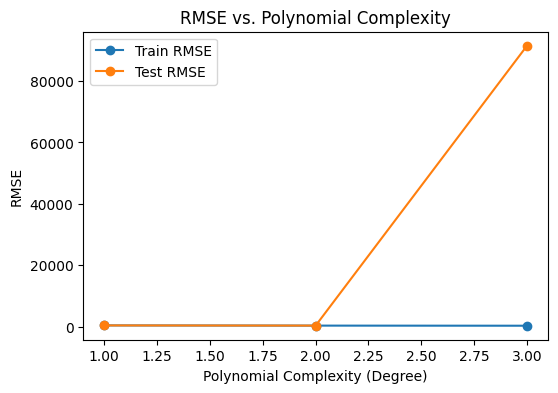

In [9]:
# Create figure
plt.figure(figsize=(6, 4))

# Add train RMSE line plot
plt.plot(degrees, train_rmse_errors, label='Train RMSE', marker='o')

# Add test RMSE line plot
plt.plot(degrees, test_rmse_errors, label='Test RMSE', marker='o')

# Add axis labels
plt.xlabel("Polynomial Complexity (Degree)")
plt.ylabel("RMSE")

# Add legend
plt.legend()

# Add title
plt.title("RMSE vs. Polynomial Complexity")

# Save fig
plt.savefig('../Graph/PolynmialComplexity.png')

# Show plot
plt.show()

## Part 2 : Building the model with the best polynomial degree
---

### Create Polynomial Features

In [10]:
pol_degree = 2

In [11]:
# Create an instance of PolynomialFeatures
converter = PolynomialFeatures(degree=pol_degree, include_bias=False)

# Fit converter to X_train andX_testing features + transform features
X_train_feat = converter.fit_transform(X_train)
X_test_feat = converter.fit_transform(X_test)
    

### Data scaling

In [12]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_feat_scaled = scaler.fit_transform(X_train_feat)

# Transform only on test data
X_test_feat_scaled = scaler.transform(X_test_feat)

### Create a Polynomial Regression Model

In [13]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_feat_scaled, y_train)

LinearRegression()

### Use model on testing dataset

In [14]:
# Get prediction for testing dataset
y_pred = model.predict(X_test_feat_scaled)

### Plot the residuals

Text(0.5, 1.0, 'QQ plot')

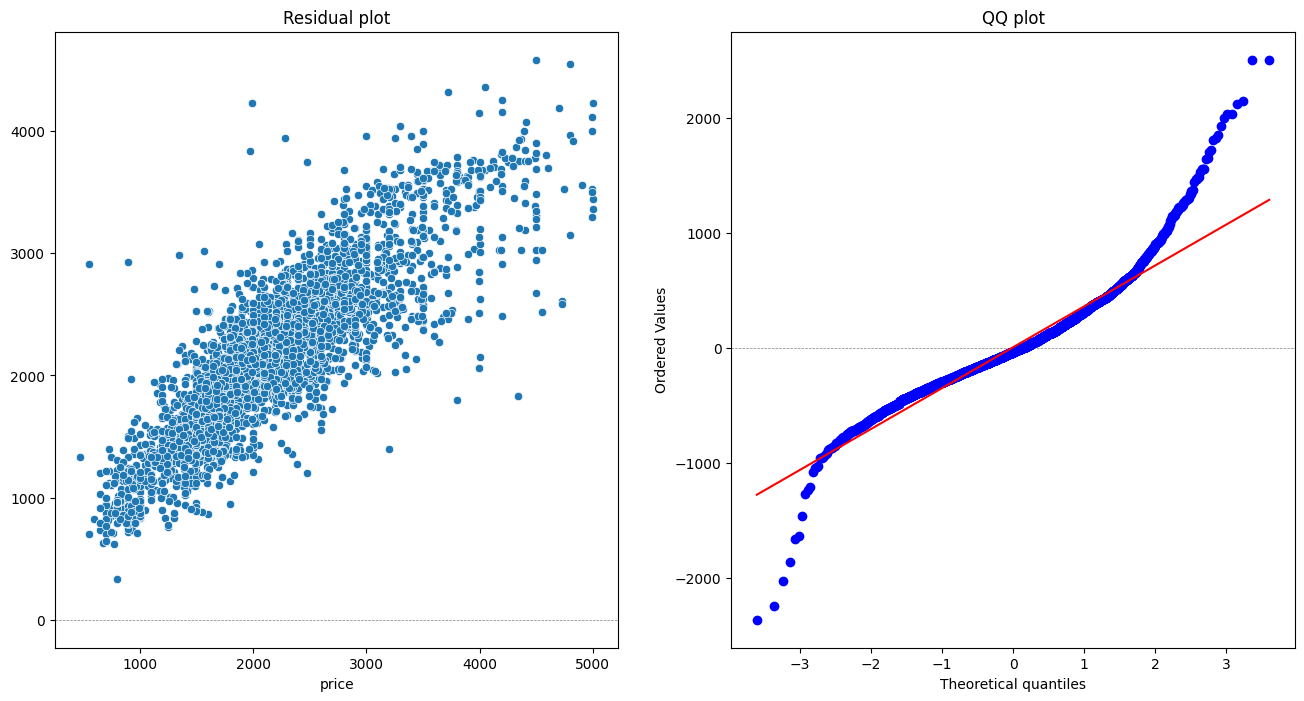

In [15]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=y_test, y=y_pred, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(y_test-y_pred, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

### Compute error scores

In [16]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.2f}\n\
The R2 scores = {r2:.2f}')

The Mean Absolute Error = 263
The Mean Square Error = 134968
The Root Mean Square Error = 367.38
The R2 scores = 0.74



| Regression Method   | Predictors  | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ----------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | SelectKBest (15) | 407                | 309293             | 556                   | 0.41           |
|                     | Highest corr (15)| 322                | 200112             | 447                   | 0.62           |
|                     | SelectKBest (20) | 345                | 226796             | 476                   | 0.57           |
|                     | Highest corr (20)| 316                | 194185             | 441                   | 0.63           |
|                     | SelectKBest (30) | 307                | 182991             | 428                   | 0.65           |
|                     | Highest corr (30)| 308                | 185664             | 431                   | 0.65           |
| Polynomial (2nd)         | SelectKBest (15) | 319                | 197348             | 444                   | 0.63           |
|                     | Highest corr (15)| 278                | 150742             | 388                   | 0.71           |
|                     | SelectKBest (20) | 302                | 176505             | 420                   | 0.67           |
|                     | Highest corr (20)| 274                | 147937             | 385                   | 0.72           |
|                     | SelectKBest (30) | 263                | 134968             | 367                   | 0.74           |
|                     | Highest corr (30)| 266                | 138808             | 373                   | 0.74           |
| Ordinary Least Square | SelectKBest (15) | 407                | 309293             | 556                   | 0.41           |
|                       | SelectKBest (15) + sq_ft^2 + sin(longitude) | 371                | 261830             | 512                   | 0.50           |
|                     | Highest corr (15)| 322                | 200112             | 447                   | 0.62           |
|                     | Highest corr (15) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds²| 316                | 190964             | 437                   | 0.64           |
|                     | SelectKBest (20) | 345                | 226796             | 476                   | 0.57           |
|                     | SelectKBest (20) + sq_ft^2 + sin(longitude) + bath² | 336                | 213294             | 462                   | 0.60           |
|                     | Highest corr (20)| 316                | 194185             | 441                   | 0.63           |
|                     | Highest corr (20) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds²| 308                | 180525             | 425                   | 0.66           |
|                     | SelectKBest (30) | 307                | 182991             | 428                   | 0.65           |
|                     | SelectKBest (30) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds² + smoking² | 298                | 171348             | 414                   | 0.68           |
|                     | Highest corr (30)| 308                | 185664             | 431                   | 0.65           |
|                     | Highest corr (30) + sq_ft^2 + sin(latitude) +sin(longitude) + bath² + beds² + smoking²| 299                | 172231             | 415                   | 0.67           |


The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

**Conclusion** </br>

The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.


### Saving the best model 
Polynomial of second degree Regression with 30 features selected with SelecKBest


In [17]:
joblib.dump(model, "best_model_polynomial_degree2_kbest30.joblib")
joblib.dump(converter, "best_model_polynomial_degree2_kbest30_converter.joblib")
joblib.dump(scaler, "best_model_polynomial_degree2_kbest30_scaler.joblib")

['best_model_polynomial_degree2_kbest30_scaler.joblib']